# Dataproject - Fertility and Unemployment rate

#### In this data project we are examining whether there are any correlation between unemployment rates and fertility rates on a municipality level in Denmark in the years from 2007 until 2017. First we download the tables of interest from Denmark Statistics (DST) and then merge them into a combined dataset. One this combined dataset we do some graphical explorations of the evolution of the unemployment rate and the fertility rate and the correlation between the two.

In [3]:
# Importing crucial packages

## In order to run this notebook, GEOPANDAS must be installed. If you are using anaconda, this can be done
## by running the following command in the anaconda promt: "conda install -c conda-forge geopandas"
## Alternatively with pip: "pip install git+git://github.com/geopandas/geopandas.git"

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
import pandas as pd
import pydst
import geopandas as gpd
dst = pydst.Dst(lang='en')

## 1 Downloading data from DST

### 1.1 Fertility rate

We examine what datasets are available from DST

In [4]:
dst.get_subjects()

,active,desc,hasSubjects,id
0,True,Population and elections,True,02
1,True,Living conditions,True,05
2,True,Education and knowledge,True,03
3,True,Culture and National Church,True,18
4,True,"Labour, income and wealth",True,04
5,True,Prices and consumption,True,06
6,True,National accounts and government finances,True,14
7,True,Money and credit market,True,16
8,True,External economy,True,13
9,True,Business sector in general,True,07


We take a closer look at “Population and elections” since this is where we can find information about fertility.

In [5]:
dst.get_tables(subjects=['02'])

,active,firstPeriod,id,latestPeriod,text,unit,updated,variables
0,True,2008Q1,FOLK1A,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, marital status, time]"
1,True,2008Q1,FOLK1B,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, citizenship, time]"
2,True,2008Q1,FOLK1C,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, ancestry, country of origin..."
3,True,2008Q1,FOLK1D,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, citizenship, time]"
4,True,2008Q1,FOLK1E,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, ancestry, time]"
5,True,1980,FOLK2,2019,Population 1. January,number,2019-02-11 08:00:00,"[age, sex, ancestry, citizenship, country of o..."
6,True,2008,FOLK3,2019,Population 1. January,number,2019-02-11 08:00:00,"[day of birth, birth month, year of birth, time]"
7,True,1769,FT,2019,Population figures from the censuses,number,2019-02-11 08:00:00,"[national part, time]"
8,True,2008,BEF5F,2019,People born in Faroe Islands and living in Den...,number,2019-02-11 08:00:00,"[sex, age, parents place of birth, time]"
9,True,2008,BEF5G,2019,People born in Greenland and living in Denmark...,number,2019-02-11 08:00:00,"[sex, age, parents place of birth, time]"


We use the table with ID “FOD407” that contains information about fertility rates in each municipality in the years from 2006 until 2018. *Total fertility rate* describes the number of children who would be born per 1000 women, if the women were to live through until the end of the child-bearing years (15-49) and give birth to the current age specific fertility rates (OECD).


In [6]:
FOD407_vars = dst.get_variables(table_id='FOD407')
FOD407_vars['values'][1][:] ## AGE = TOT1 to include all ages

[{'id': 'TOT1', 'text': 'Total fertility rate'},
 {'id': '15-19', 'text': '15-19 years'},
 {'id': '20-24', 'text': '20-24 years'},
 {'id': '25-29', 'text': '25-29 years'},
 {'id': '30-34', 'text': '30-34 years'},
 {'id': '35-39', 'text': '35-39 years'},
 {'id': '40-44', 'text': '40-44 years'},
 {'id': '45-49', 'text': '45-49 years'}]

In [7]:
# We are only interested in the total fertility rate, hence we write 'ALDER:[TOT1]'

FOD407 = dst.get_data(table_id = 'FOD407', variables={'OMRÅDE':['*'], 'TID':['*'], 'ALDER':['TOT1'] })
FOD407.sort_values(by=['OMRÅDE', 'TID'], ascending=False)
FOD407.head()

,OMRÅDE,TID,ALDER,INDHOLD
0,All Denmark,2006,Total fertility rate,1847.6
1,Region Hovedstaden,2006,Total fertility rate,1706.2
2,Region Sjælland,2006,Total fertility rate,2061.2
3,Region Syddanmark,2006,Total fertility rate,1928.0
4,Region Midtjylland,2006,Total fertility rate,1919.1


We translate each variable name in to English.

In [8]:
FOD407_en=FOD407.rename(columns={"OMRÅDE": "AREA", "TID": "YEAR", "INDHOLD": "FERTILITY_RATE", "ALDER": "AGE"})
FOD407_en.head(10)

,AREA,YEAR,AGE,FERTILITY_RATE
0,All Denmark,2006,Total fertility rate,1847.6
1,Region Hovedstaden,2006,Total fertility rate,1706.2
2,Region Sjælland,2006,Total fertility rate,2061.2
3,Region Syddanmark,2006,Total fertility rate,1928.0
4,Region Midtjylland,2006,Total fertility rate,1919.1
5,Region Nordjylland,2006,Total fertility rate,1902.8
6,Province Byen København,2006,Total fertility rate,1555.0
7,Province Københavns omegn,2006,Total fertility rate,1924.9
8,Province Nordsjælland,2006,Total fertility rate,2143.5
9,Province Bornholm,2006,Total fertility rate,1998.8


We are only interested in *total fertility rate* and therefore drop ‘AGE’ to make merging with our other data set about unemployment rates easier. Our final data set about *total fertility rate* is called **FOD407_en**.

In [9]:
#Drops AGE

FOD407_en.drop(["AGE"], axis=1, inplace=True)
FOD407_en.head()

,AREA,YEAR,FERTILITY_RATE
0,All Denmark,2006,1847.6
1,Region Hovedstaden,2006,1706.2
2,Region Sjælland,2006,2061.2
3,Region Syddanmark,2006,1928.0
4,Region Midtjylland,2006,1919.1


### 1.2 Unemployment rate

We take a closer look at “Labour, income and wealth” because this is where we can find information about unemployment.

In [10]:
dst.get_tables(subjects=['04'])

,active,firstPeriod,id,latestPeriod,text,unit,updated,variables
0,True,2008Q1,FOLK1A,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, marital status, time]"
1,True,2008Q1,FOLK1B,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, citizenship, time]"
2,True,2008Q1,FOLK1C,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, ancestry, country of origin..."
3,True,2008Q1,FOLK1D,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, citizenship, time]"
4,True,2008Q1,FOLK1E,2019Q1,Population at the first day of the quarter,number,2019-02-11 08:00:00,"[region, sex, age, ancestry, time]"
5,True,1980,FOLK2,2019,Population 1. January,number,2019-02-11 08:00:00,"[age, sex, ancestry, citizenship, country of o..."
6,True,2008,FOLK3,2019,Population 1. January,number,2019-02-11 08:00:00,"[day of birth, birth month, year of birth, time]"
7,True,1769,FT,2019,Population figures from the censuses,number,2019-02-11 08:00:00,"[national part, time]"
8,True,2008,BEF5F,2019,People born in Faroe Islands and living in Den...,number,2019-02-11 08:00:00,"[sex, age, parents place of birth, time]"
9,True,2008,BEF5G,2019,People born in Greenland and living in Denmark...,number,2019-02-11 08:00:00,"[sex, age, parents place of birth, time]"


We use the table with ID “AULP01” that contains information about *unemployment rates* in each municipality in the years from 2007 until 2017. *Unemployment rate* is the share of unemployed people as a percentage of the total labour force. The labour force consists of people who are available to the labour market in the ages between 15 and 69. We are only interested in the total *unemployment rate* and therefore don’t condition on age and gender.

In [11]:
AULP01_vars = dst.get_variables(table_id='AULP01')
AULP01_vars

,elimination,id,map,text,time,values
0,True,OMRÅDE,denmark_municipality_07,region,False,"[{'id': '000', 'text': 'All Denmark'}, {'id': ..."
1,True,ALDER,NaN,age,False,"[{'id': 'TOT', 'text': 'Age, total'}, {'id': '..."
2,True,KØN,NaN,sex,False,"[{'id': 'TOT', 'text': 'Total'}, {'id': 'M', '..."
3,False,Tid,NaN,time,True,"[{'id': '2007', 'text': '2007'}, {'id': '2008'..."


In [12]:
AULP01 = dst.get_data(table_id = 'AULP01', variables={'OMRÅDE':['*'], 'ALDER':['TOT'], 'KØN':['TOT'], 'TID':['*'] })
AULP01.head()

,OMRÅDE,ALDER,KØN,TID,INDHOLD
0,Svendborg,"Age, total",Total,2011,6.8
1,Nordfyns,"Age, total",Total,2011,7.4
2,Langeland,"Age, total",Total,2011,7.9
3,Ærø,"Age, total",Total,2011,4.5
4,Haderslev,"Age, total",Total,2011,6.0


We translate each variable name in to English.

In [13]:
# Renaming

AULP01_en = AULP01.rename(columns={"OMRÅDE": "AREA", "ALDER": "AGE", "KØN": "GENDER",\
                                   "TID": "YEAR", "INDHOLD": "UNEMPLOYMENT_RATE"})
AULP01_en.head(6)

,AREA,AGE,GENDER,YEAR,UNEMPLOYMENT_RATE
0,Svendborg,"Age, total",Total,2011,6.8
1,Nordfyns,"Age, total",Total,2011,7.4
2,Langeland,"Age, total",Total,2011,7.9
3,Ærø,"Age, total",Total,2011,4.5
4,Haderslev,"Age, total",Total,2011,6.0
5,Billund,"Age, total",Total,2011,3.7


As mentioned, we are only interested in the *total unemployment rate* and therefore drop ‘AGE’ and ‘GENDER to make merging with our data set **FOD407_en** about fertility rates easier. Our final data set about *total unemployment rates* is called **AULP01_en**.

In [14]:
# Dropping 'AGE' and 'GENDER'

AULP01_en.drop(["AGE", "GENDER"], axis=1, inplace=True)
AULP01_en.head()

,AREA,YEAR,UNEMPLOYMENT_RATE
0,Svendborg,2011,6.8
1,Nordfyns,2011,7.4
2,Langeland,2011,7.9
3,Ærø,2011,4.5
4,Haderslev,2011,6.0


## 2 Merging Data sets

We now merge the two data sets **FOD407_en** and **AULP01_en** and call the data set **merged_data**.

In [15]:
# Merging

merged_data = pd.merge(FOD407_en, AULP01_en, on=['YEAR', 'AREA'], how='left')
merged_data.head(200)

,AREA,YEAR,FERTILITY_RATE,UNEMPLOYMENT_RATE
0,All Denmark,2006,1847.6,NaN
1,Region Hovedstaden,2006,1706.2,NaN
2,Region Sjælland,2006,2061.2,NaN
3,Region Syddanmark,2006,1928.0,NaN
4,Region Midtjylland,2006,1919.1,NaN
5,Region Nordjylland,2006,1902.8,NaN
6,Province Byen København,2006,1555.0,NaN
7,Province Københavns omegn,2006,1924.9,NaN
8,Province Nordsjælland,2006,2143.5,NaN
9,Province Bornholm,2006,1998.8,NaN


There are a lot of missing observations for * total unemployment rate* because the two data sets don’t cover the same time span. **FOD407_en** covers the years 2006 until 2018 and **AULP01_en** 2007 until 2017. We therefore delete all observations from the years 2006 and 2018.

There are also missing observations for the municipalities Læsø, Samsø, Ærø, Fanø and Christiansø because of two few observations, so these municipalities have to be deleted from the data set as well.

Our data set also contains information on a regional level, which we chose to delete, so we only have observation for all of Denmark and the municipalities.


In [16]:
# Checking for missing observations

missingrateBirth=merged_data[merged_data['FERTILITY_RATE'] == '..']
print(missingrateBirth['AREA'].unique())
print(merged_data.isnull().values.any())

['Christiansø' 'Ærø' 'Fanø' 'Samsø' 'Læsø']
True


In [17]:
# We drop NaN values and censored values

merged_data = merged_data.dropna()
merged_data = merged_data[merged_data['FERTILITY_RATE'] != '..']

# We drop areas that are not municipal or country level

for val in ['Region', 'Province']: 
    I = merged_data.AREA.str.contains(val)
    merged_data = merged_data.loc[I == False] # keep everything else

# Checking if the observations have been dropped

print(merged_data.AREA.unique())
print(merged_data.AREA.nunique())

['All Denmark' 'Copenhagen' 'Frederiksberg' 'Dragør' 'Tårnby' 'Ballerup'
 'Brøndby' 'Gentofte' 'Gladsaxe' 'Glostrup' 'Herlev' 'Albertslund'
 'Hvidovre' 'Høje-Taastrup' 'Lyngby-Taarbæk' 'Rødovre' 'Ishøj'
 'Vallensbæk' 'Furesø' 'Allerød' 'Fredensborg' 'Helsingør' 'Hillerød'
 'Hørsholm' 'Rudersdal' 'Egedal' 'Frederikssund' 'Halsnæs' 'Gribskov'
 'Bornholm' 'Greve' 'Køge' 'Roskilde' 'Solrød' 'Lejre' 'Odsherred'
 'Holbæk' 'Faxe' 'Kalundborg' 'Ringsted' 'Slagelse' 'Stevns' 'Sorø'
 'Lolland' 'Næstved' 'Guldborgsund' 'Vordingborg' 'Middelfart' 'Assens'
 'Faaborg-Midtfyn' 'Kerteminde' 'Nyborg' 'Odense' 'Svendborg' 'Nordfyns'
 'Langeland' 'Haderslev' 'Billund' 'Sønderborg' 'Tønder' 'Esbjerg' 'Varde'
 'Vejen' 'Aabenraa' 'Fredericia' 'Kolding' 'Vejle' 'Horsens' 'Syddjurs'
 'Norddjurs' 'Favrskov' 'Odder' 'Randers' 'Silkeborg' 'Skanderborg'
 'Aarhus' 'Hedensted' 'Herning' 'Holstebro' 'Lemvig' 'Struer'
 'Ikast-Brande' 'Ringkøbing-Skjern' 'Skive' 'Viborg' 'Morsø' 'Thisted'
 'Brønderslev' 'Frederikshavn

The *total fertility rate* is listed as an object, so we change it to a numerical variable to enable our further analysis.

In [18]:
merged_data['FERTILITY_RATE_F'] = pd.to_numeric(merged_data['FERTILITY_RATE'])

## Checking if FERTILITY_RATE_F now is a float64
merged_data['FERTILITY_RATE_F'].head(10)

116    1843.5
133    1547.0
134    1692.6
135    2109.5
136    2227.0
137    1847.4
138    2015.5
139    1956.2
140    2023.0
141    1841.5
Name: FERTILITY_RATE_F, dtype: float64

## 3 Descriptive Analysis

### 3.1 Fertility and unemployment rates

We start by looking at the structure of the map data.

,REGIONKODE,REGIONNAVN,KOMKODE,KOMNAVN,Landsel,Landskode,geometry
0,1084,Region Hovedstaden,0400,Bornholm,Bornholm,8,"(POLYGON ((891187.49 6118170.25, 891186.3 6118..."
1,1085,Region Sjælland,0259,Køge,Østsjælland,7,"(POLYGON ((702347.24 6155011.31, 702342.570000..."
2,1085,Region Sjælland,0350,Lejre,Østsjælland,7,"(POLYGON ((684542.65 6171881.69, 684546.91 617..."
3,1085,Region Sjælland,0265,Roskilde,Østsjælland,7,"(POLYGON ((694011.6900000001 6183259.77, 69402..."
4,1085,Region Sjælland,0269,Solrød,Østsjælland,7,"(POLYGON ((703151.55 6157196.08, 703152.15 615..."


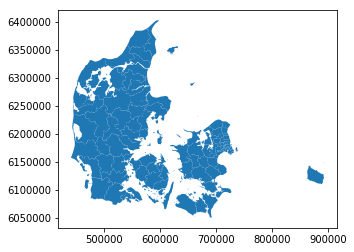

In [19]:
## KOM_MULTIPART.dbf , KOM_MULTIPART.shp and KOM_MULTIPART.shx must be placed 
## in the same folder as the saved notebook, in order for the code to work

## Read the GEO file
map_df = gpd.read_file("KOM_MULTIPART.shp")

## Plot the raw geodata
map_df.plot()

## Look the the structure of the geodata 
map_df.head()

 We are afraid some of the municipalities are named differently in the map data compared to the DST API data.

In [20]:
## We find the unique municipals in the map dataset and our DST data
merged_munis = merged_data.AREA.unique()
map_munis = map_df.KOMNAVN.unique()

# List of municipalities in merged_munis that are named different our map data and the opposite
diff1 = [muni for muni in merged_munis if muni not in map_munis] 
diff2 = [muni for muni in map_munis if muni not in merged_munis] 

print(f'Municipalities in our API data but named differently in the map data: {diff1}')
print(f'Municipalities in our map data but named differently in API data: {diff2}')

Municipalities in our API data but named differently in the map data: ['All Denmark', 'Copenhagen', 'Høje-Taastrup']
Municipalities in our map data but named differently in API data: ['København', 'Læsø', 'Samsø', 'Ærø', 'Fanø', 'Christiansø', 'Høje Taastrup']


The map data contains the islands we dropped. This is a proboblem as NaN values cannot be plotted. We address this issue later. We rename our API data **merged_data_re**.

In [21]:
# Copy of the data
merged_data_re = merged_data.copy()

# Adjusting geo-names to merge properly
merged_data_re.loc[merged_data_re.AREA=='Copenhagen', 'AREA'] = 'København'
merged_data_re.loc[merged_data_re.AREA=='Høje-Taastrup', 'AREA'] = 'Høje Taastrup'
merged_data_re.head()

,AREA,YEAR,FERTILITY_RATE,UNEMPLOYMENT_RATE,FERTILITY_RATE_F
116,All Denmark,2007,1843.5,3.6,1843.5
133,København,2007,1547.0,5.8,1547.0
134,Frederiksberg,2007,1692.6,4.0,1692.6
135,Dragør,2007,2109.5,2.3,2109.5
136,Tårnby,2007,2227.0,3.5,2227.0


The map needs strings in order to plot - we convert to strings.

In [22]:
# Strings of the variables
merged_data_re.FERTILITY_RATE = merged_data_re.FERTILITY_RATE.astype(str)
merged_data_re.UNEMPLOYMENT_RATE = merged_data_re.UNEMPLOYMENT_RATE.astype(str)

## Look at datatypes
merged_data_re.dtypes

AREA                  object
YEAR                   int64
FERTILITY_RATE        object
UNEMPLOYMENT_RATE     object
FERTILITY_RATE_F     float64
dtype: object

Our goal is 4 columns with 2017 and 2007 values for fertility and unemployment. To achive this we split the data in 2017 and 2007 values. We also rename the columns in order to preemtively avoid conflicts of varaibles with the same name

In [23]:
# 2017 and 2007 values
merged_data_re17=merged_data_re[merged_data_re['YEAR']==2017]   
merged_data_re07=merged_data_re[merged_data_re['YEAR']==2007]

# Renaming to year specific names
merged_data_re17=merged_data_re17.rename(columns={'FERTILITY_RATE': 'FERTILITY_RATE17', 'UNEMPLOYMENT_RATE': 'UNEMPLOYMENT_RATE17' })
merged_data_re07=merged_data_re07.rename(columns={'UNEMPLOYMENT_RATE': 'UNEMPLOYMENT_RATE07', 'FERTILITY_RATE': 'FERTILITY_RATE07'})
merged_data_re17.head() 

,AREA,YEAR,FERTILITY_RATE17,UNEMPLOYMENT_RATE17,FERTILITY_RATE_F
1276,Middelfart,2017,2203.3,3.1,2203.3
1278,Assens,2017,1890.9,4.3,1890.9
1279,Faaborg-Midtfyn,2017,1924.8,4.4,1924.8
1280,Kerteminde,2017,1906.0,4.7,1906.0
1281,Nyborg,2017,2072.5,4.5,2072.5


We merge the data from the two years, so the data is in columns next to each other.  

In [24]:
merged_map = pd.merge(merged_data_re07, merged_data_re17, how='left', left_on='AREA', right_on='AREA')
merged_map.head()

,AREA,YEAR_x,FERTILITY_RATE07,UNEMPLOYMENT_RATE07,FERTILITY_RATE_F_x,YEAR_y,FERTILITY_RATE17,UNEMPLOYMENT_RATE17,FERTILITY_RATE_F_y
0,All Denmark,2007,1843.5,3.6,1843.5,2017,1751.9,4.3,1751.9
1,København,2007,1547.0,5.8,1547.0,2017,1620.1,5.0,1620.1
2,Frederiksberg,2007,1692.6,4.0,1692.6,2017,1643.8,4.2,1643.8
3,Dragør,2007,2109.5,2.3,2109.5,2017,1752.2,2.9,1752.2
4,Tårnby,2007,2227.0,3.5,2227.0,2017,2037.4,3.6,2037.4


We only want the area variable and the 4 columns with 2 years and 2 variables. The rest is left out

In [25]:
# Keeping some columns
merged_map2 = merged_map[['AREA','FERTILITY_RATE07', 'UNEMPLOYMENT_RATE07', 'FERTILITY_RATE17', 'UNEMPLOYMENT_RATE17']]
merged_map2.head()

,AREA,FERTILITY_RATE07,UNEMPLOYMENT_RATE07,FERTILITY_RATE17,UNEMPLOYMENT_RATE17
0,All Denmark,1843.5,3.6,1751.9,4.3
1,København,1547.0,5.8,1620.1,5.0
2,Frederiksberg,1692.6,4.0,1643.8,4.2
3,Dragør,2109.5,2.3,1752.2,2.9
4,Tårnby,2227.0,3.5,2037.4,3.6


We want to merge the DST data on the geo-dataframe in order to plot it. In the final dataset to plot, we cannot have NaN values from the small islands. These are also droppped. 

In [26]:
# Merge
final_map = pd.merge(map_df, merged_map2, how='left', left_on='KOMNAVN', right_on='AREA')

#Dropping missings
final_map = final_map.dropna()

final_map.head()

,REGIONKODE,REGIONNAVN,KOMKODE,KOMNAVN,Landsel,Landskode,geometry,AREA,FERTILITY_RATE07,UNEMPLOYMENT_RATE07,FERTILITY_RATE17,UNEMPLOYMENT_RATE17
0,1084,Region Hovedstaden,0400,Bornholm,Bornholm,8,"(POLYGON ((891187.49 6118170.25, 891186.3 6118...",Bornholm,2105.2,7.3,1837.7,4.6
1,1085,Region Sjælland,0259,Køge,Østsjælland,7,"(POLYGON ((702347.24 6155011.31, 702342.570000...",Køge,2061.7,3.2,1971.8,3.9
2,1085,Region Sjælland,0350,Lejre,Østsjælland,7,"(POLYGON ((684542.65 6171881.69, 684546.91 617...",Lejre,2552.5,1.9,2126.1,3.2
3,1085,Region Sjælland,0265,Roskilde,Østsjælland,7,"(POLYGON ((694011.6900000001 6183259.77, 69402...",Roskilde,1853.8,2.3,1751.4,3.6
4,1085,Region Sjælland,0269,Solrød,Østsjælland,7,"(POLYGON ((703151.55 6157196.08, 703152.15 615...",Solrød,1881.8,2.6,2185.9,2.7


We need to select variables that the map must base the values after. We name the Visvarxx.. We also need the color sidebar to be have the same range as our map. This is ensured by vmin and vmax. 2007 turns out to have the most extreme values.

In [27]:
## The variable to visualize after is defined here
VisVarFer07 = 'FERTILITY_RATE07'
VisVarFer17 = 'FERTILITY_RATE17'
VisVarUne07 = 'UNEMPLOYMENT_RATE07'
VisVarUne17 = 'UNEMPLOYMENT_RATE17'

# set the range for the choropleth - this will be consistent for all plots of the same variable.
# 2007 had the most extreme values
vminFer, vmaxFer = merged_map['FERTILITY_RATE07'].min() , merged_map['FERTILITY_RATE07'].max()
vminUNE, vmaxUNE = merged_map['UNEMPLOYMENT_RATE07'].min() , merged_map['UNEMPLOYMENT_RATE07'].max()

 With missings removed, Læsø, Samsø, Ærø, Fanø and Christiansø are removed on the map. We now make the actual plot. 

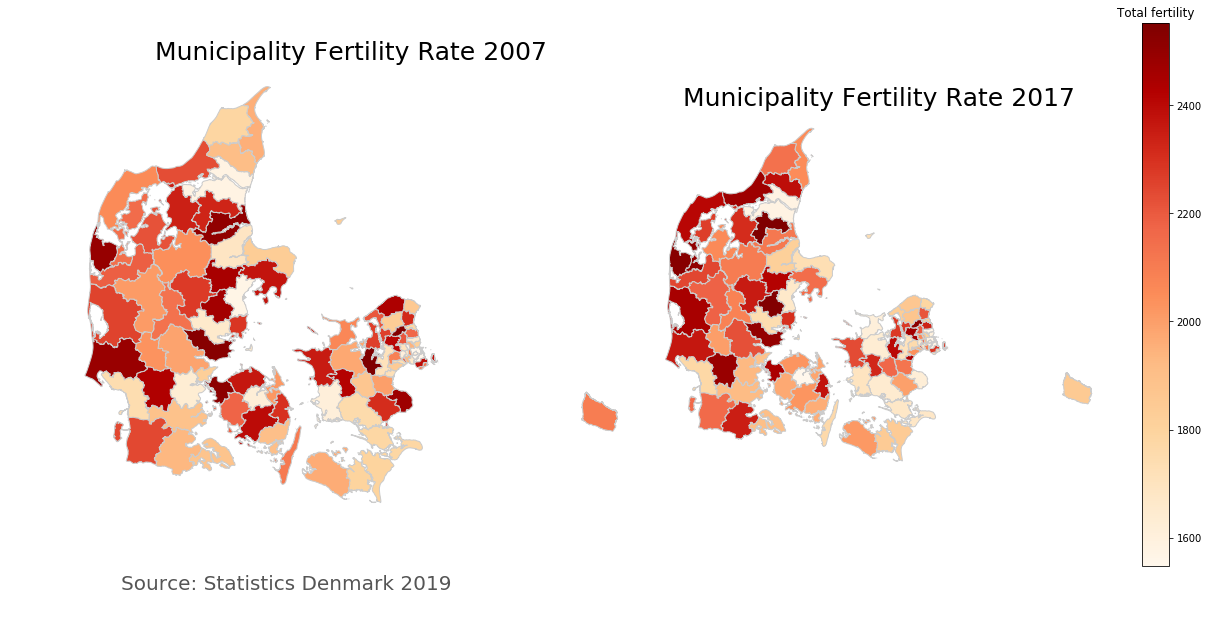

In [28]:
# create figure, axes, size, remove whitespace and align the size of the figures in Matplotlib
side_length = 10
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(side_length * 2.1, side_length) , subplot_kw={'aspect': 1})
fig.subplots_adjust(hspace=0.0, wspace=0.0)

# We do not want axis to display values on our map - makes no sense
ax1.axis('off')
ax2.axis('off')

# add a title for map 1 - fix the size of the text.
ax1.set_title('Municipality Fertility Rate 2007', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

## The actual plot is created with our colour map being set equal to OrRd
ax1=final_map.plot(column=VisVarFer07,  cmap='OrRd', ax=ax1, edgecolor='0.8')
# Attempt to get two maps of equal size
ax1.set_aspect('equal')

# create an annotation for the  data source
ax1.annotate('Source: Statistics Denmark 2019',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=20, color='#555555')

# add a title for map 2 - fix the size of the text.
ax2.set_title('Municipality Fertility Rate 2017', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

## The actual second plot is created with our colour map being set equal to OrRd
ax2=final_map.plot(column=VisVarFer17,  cmap='OrRd', ax=ax2, edgecolor='0.8')
# Attempt to get two maps of equal size
ax2.set_aspect('equal')

## The color scale on the right is created in relation to the data with vmin and vmax. Same color theme.
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vminFer, vmax=vmaxFer))

# Empty array
sm._A = []

# Make a colour bar based on the color scale created above.
cbar = fig.colorbar(sm)

# Set a title for the color bar
cbar.ax.set_title('Total fertility')

plt.show()

There is no apparent geographical pattern in the fertility rate. There does not seem to be any significant differences in the geographic pattern of the fertility rate from 2007 to 2017. However, it looks like the fertility rate in general increases from 2007 to 2017. This can be seen by the larger amount of “red” municipalities.

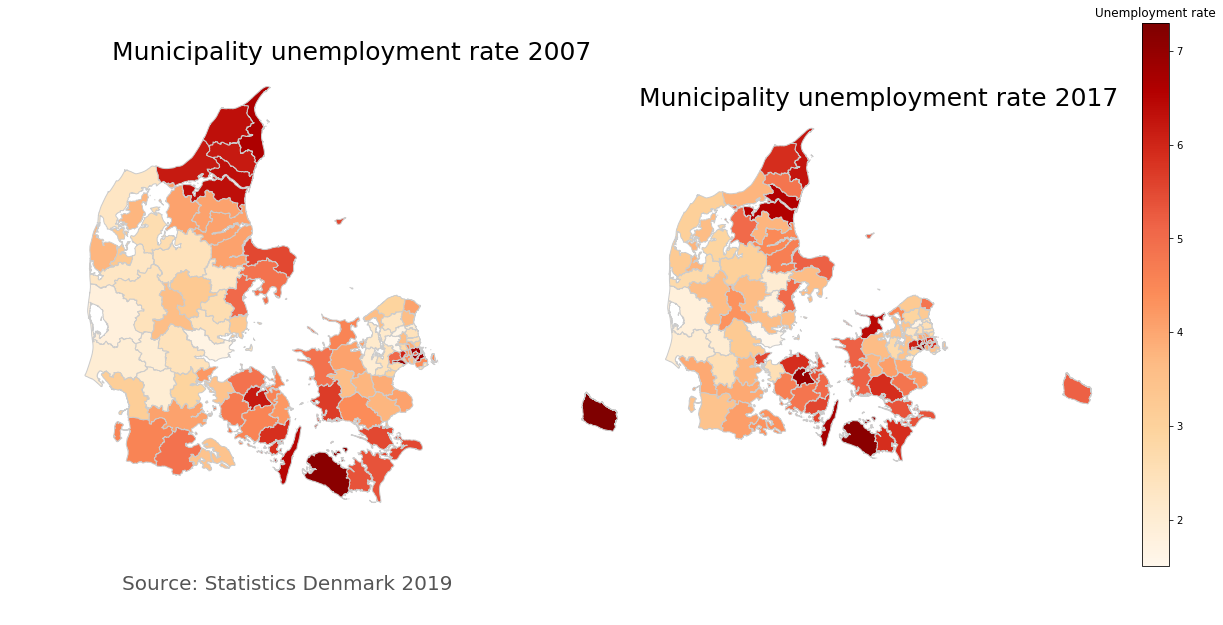

In [29]:
# create figure, axes, size, remove whitespace and align the size of the figures in Matplotlib
side_length = 10
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(side_length * 2.1, side_length) , subplot_kw={'aspect': 1})
fig.subplots_adjust(hspace=0.0, wspace=0.0)

# We do not want axis to display values on our map - makes no sense
ax1.axis('off')
ax2.axis('off')

# add a title for map 1 - fix the size of the text.
ax1.set_title('Municipality unemployment rate 2007', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

## The actual plot is created with our colour map being set equal to OrRd
ax1=final_map.plot(column=VisVarUne07,  cmap='OrRd', ax=ax1, edgecolor='0.8')
# Attempt to get two maps of equal size
ax1.set_aspect('equal')

# create an annotation for the  data source
ax1.annotate('Source: Statistics Denmark 2019',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=20, color='#555555')

# add a title for map 2 - fix the size of the text.
ax2.set_title('Municipality unemployment rate 2017', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

## The actual second plot is created with our colour map being set equal to OrRd
ax2=final_map.plot(column=VisVarUne17,  cmap='OrRd', ax=ax2, edgecolor='0.8')
# Attempt to get two maps of equal size
ax2.set_aspect('equal')

## The color scale on the right is created in relation to the data with vmin and vmax. Same color theme.
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vminUNE, vmax=vmaxUNE))

# Empty array
sm._A = []

# Make a colour bar based on the color scale created above.
cbar = fig.colorbar(sm)

# Set a title for the color bar
cbar.ax.set_title('Unemployment rate')

plt.show()

We notice that the unemployment rate is high in the north of Jylland, the south of Sjælland and on Bornholm in 2007. Even though the unemployment seems to decrease overall in the ten-year period the same geographical pattern as in 2007 seems to exist in 2017 when considering the unemployment rate.

### 3.2 Development in the fertility and the unemployment rate

We construct two indices to illustrate the growth in the *total fertility rate* and the *total unemployment rate*.

In [30]:
# We make a copy of our data and call it merged_data1

merged_data1 = merged_data.copy()
merged_data1 = merged_data1.set_index("YEAR")

# We make a new variable for the FERTILITY_RATE index

merged_data1['FERTILITY INDEX'] = merged_data1.groupby('AREA')['FERTILITY_RATE_F'].transform(lambda x: x/x[2007]*100)
print(merged_data1.head())

# We make a new variable for the UNEMPLOYMENT_RATE index

merged_data1['UNEMPLOYMENT INDEX'] = merged_data1.groupby('AREA')['UNEMPLOYMENT_RATE'].transform(lambda x: x/x[2007]*100)
print(merged_data1.head())


               AREA FERTILITY_RATE  UNEMPLOYMENT_RATE  FERTILITY_RATE_F  \
YEAR                                                                      
2007    All Denmark         1843.5                3.6            1843.5   
2007     Copenhagen         1547.0                5.8            1547.0   
2007  Frederiksberg         1692.6                4.0            1692.6   
2007         Dragør         2109.5                2.3            2109.5   
2007         Tårnby         2227.0                3.5            2227.0   

      FERTILITY INDEX  
YEAR                   
2007            100.0  
2007            100.0  
2007            100.0  
2007            100.0  
2007            100.0  
               AREA FERTILITY_RATE  UNEMPLOYMENT_RATE  FERTILITY_RATE_F  \
YEAR                                                                      
2007    All Denmark         1843.5                3.6            1843.5   
2007     Copenhagen         1547.0                5.8            1547.0   
2007  

To do a visual analysis of the correlation of the growth in the *total fertility rate* and the *total unemployment rate* we make a figure of the two indices with a drop-down menu.

In [31]:
# UNEMPLOYMENT RATE

def interactive_figure(fokus):
    # Choosing municipality for the graph 
    merged_data2 = merged_data1[merged_data1.AREA.isin([fokus])]


    # Summing the observations grouped by the regions and plotting the graph
    merged_data2.groupby('AREA')['UNEMPLOYMENT INDEX', 'FERTILITY INDEX'].plot(legend=True);
    plt.title('Development in fertility rate and unemployment rate 2007-2017')
    #plt.figure(figsize=(20,10))
    plt.show()

liste=merged_data1.AREA.unique()

widgets.interact(interactive_figure,
    fokus=widgets.Dropdown(description="$Municipal$", options=liste, value='Slagelse'),);

interactive(children=(Dropdown(description='$Municipal$', index=40, options=('All Denmark', 'Copenhagen', 'Fre…

It can be seen by going through the different municipalities in the figure that there, at first sight, is no consistent correlation between the total fertility rate and the unemployment rate. This is to some extent also what we would expect, since there are of course a lot of different factors that potentially affect both the fertility rate and the unemployment rate. However, we notice that all the municipalities have a clear increase in the unemployment rate from 2008-2010. These increases in unemployment are most likely due to the impact of the financial crisis. We also see a decrease in the total fertility rate from 2010-2013. Since the effects of births are lagged by nature with 9 months, this decrease in fertility rate might be due to the increase in unemployment during the financial crisis.

If we are to follow a hypothesis that people will be less likely to birth a child if they have recently lost their job (or the people around them are losing their job), then the hypothesis of a negative correlation between unemployment and fertility might, to some extent, be present in our data.

We notice that after 2013 the fertility rates seem to increase again, which could indicate that e.g. couples had postponed getting children to after the financial crisis, where the job security was more favorable. 

In conclusion we see that, when we consider small fluctuations in the economy, there does not seem to be a correlation between fertility rate and unemployment rate. However, when the economy is highly unstable, then the fertility rate seems to be correlated with the unemployment rate. It is important to keep in mind, that there are other factors that might be the reason for the correlation to occur.